# Project 2 : Heart Disease
### Group Memebers:
1. Julian Ruggiero
2. Omar M. Hussein

### Part 1: Introduction

we will work with a dataset containing information regarding patients with some of which are facing a heart disease while others don't.
According to the World Health Organization, of the 56.9 million deaths worldwide in 2016 ischaemic heart disease and stroke are the world’s biggest killers, accounting for a combined 15.2 million deaths in 2016. These diseases have remained the leading causes of death globally in the last 15 years [1].

<img src="Data/Images/Top 10 global death causes.png"/>


To learn how to prevent heart disease we must first learn to reliably detect it and in this project, we focus on understanding patients’ data and heart disease diagnose results.

### - Research question(s)

##### Who are the people that are susceptible to heart diseases the most? and How do men and women differ in that regard?

--------------------------------------




### Part 2: Data Summary

We acquired a dataset that is used in a machine learning competition where the purpose is to predict if a patient will face or not a heart-based disease on existing data. The link to the competition is below [2].

And the dataset information and data folder is in the following link:[3]


The dataset contains 14 attributes, including the last field with a value related to the Absence (1) or presence (2) of heart disease. It contains 270 records or instances.

#### Data Dictionary:

1. age: Age of each of the patients
    - Categorical ordinal.
    
2. sex (0: female, 1: male): Gender of the patient
    - Categorical nominal.
    
3. chest pain type (1: typical angina, 2: atypical angina, 3: non-anginal pain, 4: asymptomatic)
    - Categorical nominal.
    - More on chest pain types 
        - typical angina: Typical angina was defined as “the presence of substernal chest pain or discomfort that was provoked    by exertion or emotional stress and was relieved by rest and/or nitroglycerin[5]
        - atypical angina: Atypical angina implies that the complaint is actually angina pectoris, though not conforming in every way to the expected or classic description; noncardiac chest pain implies confidence that the problem doesn't rest with the heart,[6]
        - non-anginal pain: The chest pain does not relate to angina in any way but it’s present[7]
        - asymptomatic: means neither causing nor exhibiting symptoms of the disease.[8]
    
    
4. resting_blood_pressure: Optimal blood pressure typically is defined as 120 mm Hg systolic — which is the pressure as your heart beats — over 80 mm Hg diastolic — which is the pressure as your heart relaxes [9]
    - Continuous numeric.
    
5. serum_cholesterol in mg/dl: cholesterol level is a measurement of certain elements in the blood, including the amount of high- and low-density lipoprotein cholesterol  [10]
    - Continuous numeric.
    
6. fasting blood sugar > 120 mg/dl: A fasting blood sugar level less than 100 mg/dL (5.6 mmol/L) is normal. A fasting blood sugar level from 100 to 125 mg/dL (5.6 to 6.9 mmol/L) is considered prediabetes. If it's 126 mg/dL (7 mmol/L) or higher on two separate tests, you have diabetes[11]
    - Categorical nominal.
    
7. resting electrocardiographic results (0: normal, 1: having ST-T wave abnormality, T wave inversions and/or ST elevation or depression of > 0.05 mV, 2: showing probable or definite left ventricular hypertrophy by Estes' criteria): [12]
    - Categorical nominal.
    
8. maximum heart rate achieved (beats per minute)[13]
    - Continuous numeric.
    
9. exercise induced angina (exercise-induced chest pain, 0: False, 1: True) Angina is a type of chest pain caused by reduced blood flow to the heart. Angina (an-JIE-nuh or AN-juh-nuh) is a symptom of coronary artery disease.[14]
    - Categorical nominal.
    
10. oldpeak (mm)
    - Continuous numeric.
    
     ST depression induced by exercise relative to rest [4]. This refers to a finding on an electrocardiogram, wherein the trace in the ST segment is abnormally low below the baseline. It is often a sign of myocardial ischemia, of which coronary insufficiency is a major cause. Example in the image below.
<img src="Data/Images/ST Depression.png"/>

11. the slope of the peak exercise ST  (1: upsloping, 2: flat, 3: downsloping)
    - Categorical ordinal.
    
12. number of major vessels (0-3) colored by fluoroscopy
    - Categorical nominal.
    
13. thal: results of thallium stress test measuring blood flow to the heart (3 = normal; 6 = fixed defect; 7 = reversible defect)
    - Categorical ordinal.
    
14. Absence (1) or presence (2) of heart disease
    - Categorical nominal.
    




### Part 3: Exploratory Data Analysis (EDA)

First we will read the data and provide some transformations to make it easier to read and understand. The dataset contains spaces as the delimeter and no column names, these will be added based on the attributes listed above.

In [1]:
# Importing all the necassary packages
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

%matplotlib inline

In [2]:
# delimeter=' ' is necessary because the file is delimited by spaces instead of colons
# header=None to avoid losing the first row when assigning columns
url = 'https://raw.githubusercontent.com/gitjuli/DAV-5400/master/Data/heart.dat'
#url = "https://raw.githubusercontent.com/OMS1996/DAV-5400/master/Data/heart.dat"
#Read the file into the data frame
df=pd.read_csv(url, delimiter=' ',header=None)
# Viewing the first 5 rows
df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


In [3]:
#creating columns based on dataset information
df.columns=['age','sex','chest_pain_tp', 'rest_bld_press','cholest',
           'f_sug_ovr_120','rest_electro', 'max_heart_rate', 
            'ex_ind_chest_pain','oldpeak','peak_slope', 'vessels',
           'thal','disease']
# Viewing the first 5 rows
df.head(5)

,age,sex,chest_pain_tp,rest_bld_press,cholest,f_sug_ovr_120,rest_electro,max_heart_rate,ex_ind_chest_pain,oldpeak,peak_slope,vessels,thal,disease
0,70.0,1.0,4.0,130.0,322.0,0.0,2.0,109.0,0.0,2.4,2.0,3.0,3.0,2
1,67.0,0.0,3.0,115.0,564.0,0.0,2.0,160.0,0.0,1.6,2.0,0.0,7.0,1
2,57.0,1.0,2.0,124.0,261.0,0.0,0.0,141.0,0.0,0.3,1.0,0.0,7.0,2
3,64.0,1.0,4.0,128.0,263.0,0.0,0.0,105.0,1.0,0.2,2.0,1.0,7.0,1
4,74.0,0.0,2.0,120.0,269.0,0.0,2.0,121.0,1.0,0.2,1.0,1.0,3.0,1


We will create heatmaps for woman and men with disease using seaborn

In [4]:
# Split disease and not diseased
disease_yes=df[df.iloc[:,13]==2]# Yes
disease_no=df[df.iloc[:,13]==1]# disease = No

# split to male and female
disease_yes_male=disease_yes[disease_yes.iloc[:,1]==1] #male with disease
disease_yes_female=disease_yes[disease_yes.iloc[:,1]==0] #female with disease

# split to male and female
disease_no_male=disease_no[disease_no.iloc[:,1]==1]
disease_no_female=disease_no[disease_no.iloc[:,1]==0]

del disease_yes_male['disease']
del disease_yes_male['sex']
del disease_yes_female['disease']
del disease_yes_female['sex']

The following is a correlation matrix for men having a disease

In [5]:
# Correlation for males
corr = disease_yes_male.corr()
# Generate a custom diverging colormap
custom = sns.diverging_palette(220, 11, as_cmap=True)
corr.style.background_gradient(cmap=custom).set_precision(2)

,age,chest_pain_tp,rest_bld_press,cholest,f_sug_ovr_120,rest_electro,max_heart_rate,ex_ind_chest_pain,oldpeak,peak_slope,vessels,thal
age,1,-0.073,0.2,0.21,0.13,0.14,-0.2,0.035,0.11,0.13,0.36,-0.16
chest_pain_tp,-0.073,1,-0.22,-0.052,-0.032,0.081,-0.28,0.37,0.049,-0.01,0.15,0.17
rest_bld_press,0.2,-0.22,1,0.26,0.1,0.077,0.016,0.052,0.087,0.14,-0.019,0.19
cholest,0.21,-0.052,0.26,1,0.092,0.047,0.0033,0.12,-0.12,-0.011,0.15,-0.0089
f_sug_ovr_120,0.13,-0.032,0.1,0.092,1,0.11,0.1,0.079,-0.052,0.09,0.083,0.045
rest_electro,0.14,0.081,0.077,0.047,0.11,1,0.015,0.035,-0.06,0.015,0.13,-0.17
max_heart_rate,-0.2,-0.28,0.016,0.0033,0.1,0.015,1,-0.37,-0.29,-0.42,-0.092,0.084
ex_ind_chest_pain,0.035,0.37,0.052,0.12,0.079,0.035,-0.37,1,0.26,0.23,0.058,0.16
oldpeak,0.11,0.049,0.087,-0.12,-0.052,-0.06,-0.29,0.26,1,0.56,0.01,0.13
peak_slope,0.13,-0.01,0.14,-0.011,0.09,0.015,-0.42,0.23,0.56,1,-0.1,0.11


Now a correlation with woman having a disease

In [6]:
corr = disease_yes_female.corr()
# Generate a custom diverging colormap
custom = sns.diverging_palette(220, 11, as_cmap=True)
corr.style.background_gradient(cmap=custom).set_precision(2)

,age,chest_pain_tp,rest_bld_press,cholest,f_sug_ovr_120,rest_electro,max_heart_rate,ex_ind_chest_pain,oldpeak,peak_slope,vessels,thal
age,1,0.001,0.065,-0.42,-0.26,-0.15,0.13,-0.42,-0.11,0.018,0.47,-0.15
chest_pain_tp,0.001,1,0.22,-0.057,-0.3,-0.028,0.15,0.31,0.3,0.38,-0.083,0.14
rest_bld_press,0.065,0.22,1,-0.23,0.22,0.085,-0.12,0.21,0.25,0.33,0.0049,0.11
cholest,-0.42,-0.057,-0.23,1,0.04,0.3,0.083,0.12,-0.11,-0.37,-0.16,0.0088
f_sug_ovr_120,-0.26,-0.3,0.22,0.04,1,-0.031,-0.15,0.12,0.0071,0,0.22,0.058
rest_electro,-0.15,-0.028,0.085,0.3,-0.031,1,0.22,-0.37,0.3,0,0.19,0.24
max_heart_rate,0.13,0.15,-0.12,0.083,-0.15,0.22,1,0.099,-0.11,-0.2,-0.1,-0.2
ex_ind_chest_pain,-0.42,0.31,0.21,0.12,0.12,-0.37,0.099,1,-0.056,0.18,-0.46,0.1
oldpeak,-0.11,0.3,0.25,-0.11,0.0071,0.3,-0.11,-0.056,1,0.78,0.45,0.34
peak_slope,0.018,0.38,0.33,-0.37,0,0,-0.2,0.18,0.78,1,0.38,0.37


 We can see some differences in the correlation matrixes, and we will work on these on part 4.
 Before we move any forward it would be best if we replace the numeric categorical values into more readable values

In [7]:
# Replacing all the 0s with Female and all the 1s with Male
df.sex.replace({0: 'Female', 1: 'Male'}, inplace = True)
# Replace the 1 and 2 with No and Yes respectively
df.disease.replace({1: 'No', 2: 'Yes'}, inplace = True)
# Replace the values with the terminology
df['chest_pain_tp'].replace({1.0: 'typical angina', 2.0: 'atypical angina', 3.0: 'non-anginal pain', 4.0: 'asymptomatic'}, inplace = True)
# Replacing all the 0s with NO and 1s with YES
df['f_sug_ovr_120'].replace({0: 'No', 1: 'Yes'}, inplace = True)
# Replacing all the 0s with NO and 1s with YES
df['ex_ind_chest_pain'].replace({0: 'No', 1: 'Yes'}, inplace = True)
# Replace the values with the terminology
df['peak_slope'].replace({1.0: 'upsloping', 2.0: 'flat', 3.0: 'downsloping'}, inplace = True)
# Replace the values with the terminology
df['thal'].replace({3.0: 'normal', 6.0: 'fixed defect', 7.0: 'reversable defect'}, inplace = True)
# Printing all the first 5 values
df.head()

,age,sex,chest_pain_tp,rest_bld_press,cholest,f_sug_ovr_120,rest_electro,max_heart_rate,ex_ind_chest_pain,oldpeak,peak_slope,vessels,thal,disease
0,70.0,Male,asymptomatic,130.0,322.0,No,2.0,109.0,No,2.4,flat,3.0,normal,Yes
1,67.0,Female,non-anginal pain,115.0,564.0,No,2.0,160.0,No,1.6,flat,0.0,reversable defect,No
2,57.0,Male,atypical angina,124.0,261.0,No,0.0,141.0,No,0.3,upsloping,0.0,reversable defect,Yes
3,64.0,Male,asymptomatic,128.0,263.0,No,0.0,105.0,Yes,0.2,flat,1.0,reversable defect,No
4,74.0,Female,atypical angina,120.0,269.0,No,2.0,121.0,Yes,0.2,upsloping,1.0,normal,No


###### Now we will replace certain values to make it more intuitive to analyze. The values correspond to the columns below:
 - sex
 - fasting blood sugar > 120
 - chest pain type
 - exercise ind chest pain
 - disease
 - slope of peak
 - thal

Then we will use the head() function to check that the values are correct.

###### Now we will check if there is any null values in the data and some summary statistics

In [8]:
# Are there any Null values
df.isna().sum() # Oh No null, values how "Lucky"?

age                  0
sex                  0
chest_pain_tp        0
rest_bld_press       0
cholest              0
f_sug_ovr_120        0
rest_electro         0
max_heart_rate       0
ex_ind_chest_pain    0
oldpeak              0
peak_slope           0
vessels              0
thal                 0
disease              0
dtype: int64

##### The following is the rule that we will follow for Visualisation
- if Categorical then Bar Plot
- if Continous Numeric then Histogram or BoxPlot
- We will provide on the left matplotlib and on the right seaborn graph.

### Attribute 1: Sex
Summary statistics for Sex attribute by providing a bar graph

				"Statistical Summary & Visualisation"

counts 
Male      183
Female     87
Name: sex, dtype: int64

percentages 
Male      67.777778
Female    32.222222
Name: sex, dtype: float64
Visualisation



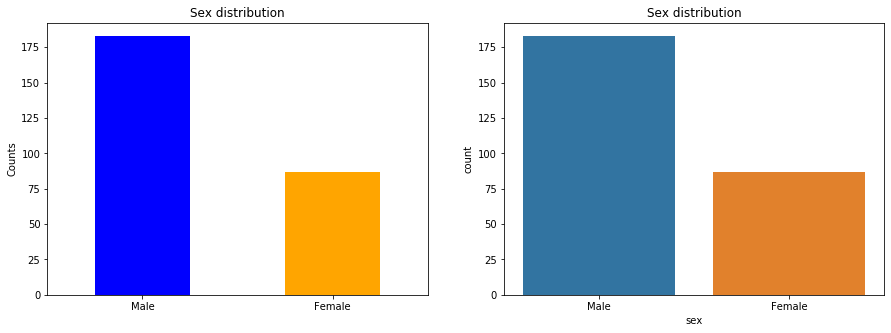

In [9]:
# Counting the Number of Males and Females that are in the Data sets
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
print("counts \n" + str(df['sex'].value_counts()))
# Showing percentages
print("\npercentages \n" + str(df['sex'].value_counts(normalize=True).mul(100)))
# Creating a figure with two subplots in the same row
# Setting the Size of the subplots
print("Visualisation\n")
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
df['sex'].value_counts().plot(kind='bar',color=["blue","orange"])
plt.ylabel('Counts')
plt.xticks(rotation='horizontal')
plt.title('Sex distribution')
plt.subplot(1, 2, 2)
sns.countplot(x='sex', data=df).set_title('Sex distribution')
plt.show();

The bar graph above shows the frequency distribution between Males and Females where there are 183 Males representing 68% percentage of the total, and there is 87 woman which represents 32% of the total.
The Number of Male patients is a lot more than the number of women patients



### Attribute 2: Age
summary statistics for Age attribute by providing a Histogram graph

				"Statistical Summary & Visualisation"

count    270.000000
mean      54.433333
std        9.109067
min       29.000000
25%       48.000000
50%       55.000000
75%       61.000000
max       77.000000
Name: age, dtype: float64


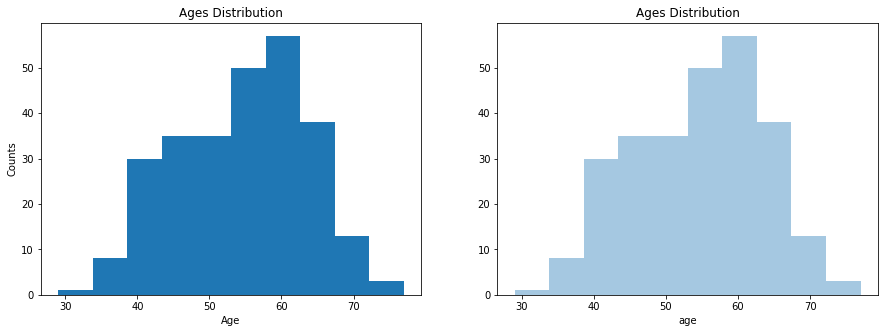

In [10]:
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
print(df['age'].describe())
# Creating a figure with two subplots in the same row
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
# define a Matplotlib figure
# define the plot you want to generate
plt.hist(df['age'])
#plt.subplot(111)
# define a title for the plot
plt.title('Ages Distribution')
# define the number of bins for the histogram + which plot axis they will
# # Matplotlib
plt.ylabel('Counts')
plt.xlabel('Age')
plt.locator_params(nbins=10, axis = 'x')
plt.subplot(1, 2, 2)
sns.distplot(df['age'],kde=False, bins = 10).set_title('Ages Distribution')
plt.show();

This histogram shows the distribution of the age variable across all patients. The Distribution is "Negatively Skewed" and it looks like the mean of the ages seems to be 54.4 years which, However, the data seems to be centralized around the 60 age mark meaning that the majority of patients are between 55 to 65.

### Attribute 3: Chest pain type
summary statistics for chest paint type attribute by providing a bar graph

				"Statistical Summary & Visualisation"

counts 
asymptomatic        129
non-anginal pain     79
atypical angina      42
typical angina       20
Name: chest_pain_tp, dtype: int64

percentages 
asymptomatic        47.777778
non-anginal pain    29.259259
atypical angina     15.555556
typical angina       7.407407
Name: chest_pain_tp, dtype: float64


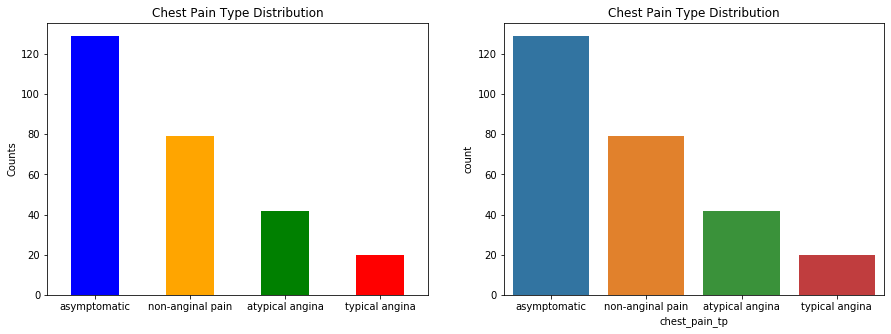

In [11]:
# Showing counts
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
print("counts \n" + str(df['chest_pain_tp'].value_counts()))
# Showing percentages
print("\npercentages \n" + str(df['chest_pain_tp'].value_counts(normalize=True).mul(100)))
# Creating a figure with two subplots in the same row
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
df['chest_pain_tp'].value_counts().plot(kind='bar',color=['blue','orange','green','red'])
plt.ylabel('Counts')
plt.xticks(rotation='horizontal')
plt.title('Chest Pain Type Distribution')
plt.subplot(1, 2, 2)
chart = sns.countplot(x='chest_pain_tp', data=df)
#chart.set_xticklabels(chart.get_xticklabels())
chart.set_title("Chest Pain Type Distribution")
plt.show();

This Histogram explains the Frequency distribution of the chest pain types which vary amongst the following types:
- A)asymptomatic
- B)non-anginal 
- C)atypical 
- D)typical angina

The types are ranked in descending order as follows: So 'asymptomatic' is the category with the most amount of records and 'typical angina' the one with the least amount of occurrences.



### Attribute 4: blood pressure
summary statistics for blood pressure attribute by providing a histogram graph

				"Statistical Summary & Visualisation"

count    270.000000
mean     131.344444
std       17.861608
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: rest_bld_press, dtype: float64


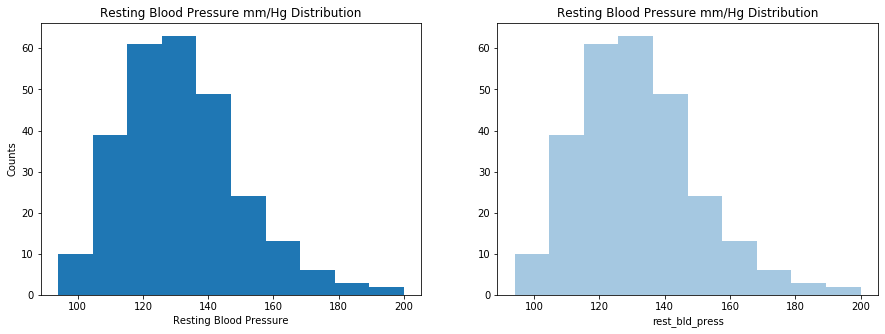

In [12]:
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
print(df['rest_bld_press'].describe())
# Creating a figure with two subplots in the same row
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
# define the plot you want to generate
plt.hist(df['rest_bld_press'])
#plt.subplot(111)
# define a title for the plot
plt.title('Resting Blood Pressure mm/Hg Distribution')
# define the number of bins for the histogram + which plot axis they will
# # Matplotlib
plt.ylabel('Counts')
plt.xlabel("Resting Blood Pressure")
plt.locator_params(nbins=10, axis = 'x')
plt.subplot(1, 2, 2)

sns.distplot(df['rest_bld_press'],kde=False, bins = 10).set_title('Resting Blood Pressure mm/Hg Distribution');
plt.show();

This histogram shows the distribution of the resting blood pressure variable (in mm/Hg: millimeters of mercury) across all patients. It is "Positively Skewed" and according to the statistics it looks like the mean is 131.34, the data is centralized between & around both 120 and 140.


### Attribute 5: serum cholesterol
summary statistics for serum cholesteral attribute by providing a histogram graph

				"Statistical Summary & Visualisation"

count    270.000000
mean     249.659259
std       51.686237
min      126.000000
25%      213.000000
50%      245.000000
75%      280.000000
max      564.000000
Name: cholest, dtype: float64


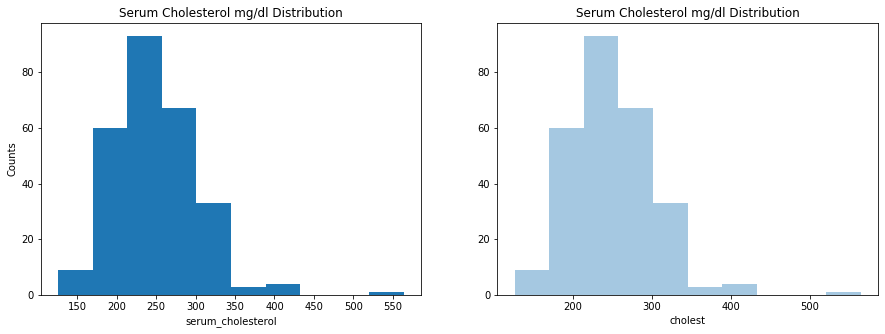

In [13]:
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
print(df['cholest'].describe())
# Creating a figure with two subplots in the same row
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
# define the plot you want to generate
plt.hist(df['cholest'])
#plt.subplot(111)
# define a title for the plot
plt.title('Serum Cholesterol mg/dl Distribution')
# define the number of bins for the histogram + which plot axis they will
# # Matplotlib
plt.locator_params(nbins=10, axis = 'x')
plt.ylabel('Counts')
plt.xlabel('serum_cholesterol')

plt.subplot(1, 2, 2)
sns.distplot(df['cholest'],kde=False, bins = 10).set_title("Serum Cholesterol mg/dl Distribution")
plt.show();

This histogram shows an idea on the distribution of the serum cholesterol (in mg/dl) across all patients and according to the statistics it looks like the mean is 249.65 mg/dl. The data is "Positively Skewed" with the data centralized around 250.



### Attribute 6: fasting blood sugar over 120
summary statistics for fasting blood sugar over 120 attribute by providing a bar graph

				"Statistical Summary & Visualisation"

counts 
No     230
Yes     40
Name: f_sug_ovr_120, dtype: int64

percentages 
No     85.185185
Yes    14.814815
Name: f_sug_ovr_120, dtype: float64


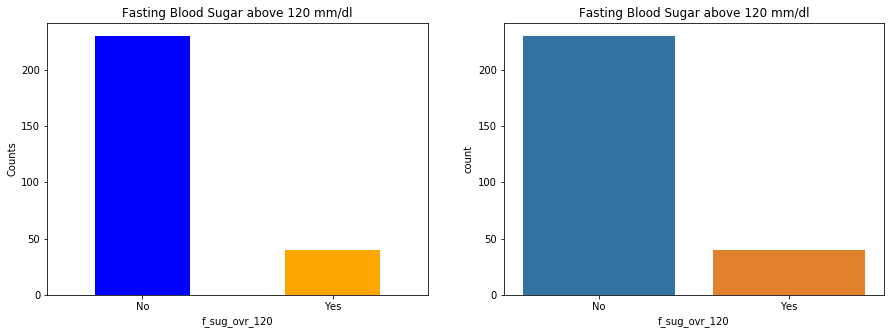

In [14]:
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
# Showing counts
print("counts \n" + str(df['f_sug_ovr_120'].value_counts()))
# Showing percentages
print("\npercentages \n" + str(df['f_sug_ovr_120'].value_counts(normalize=True).mul(100)))
# Creating a figure with two subplots in the same row
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
df['f_sug_ovr_120'].value_counts().plot(kind='bar',color=['blue','orange'])
plt.ylabel('Counts')
plt.xlabel('f_sug_ovr_120')
plt.xticks(rotation='horizontal')
plt.title("Fasting Blood Sugar above 120 mm/dl")
plt.subplot(1, 2, 2)
sns.countplot(x='f_sug_ovr_120', data=df).set_title("Fasting Blood Sugar above 120 mm/dl")
plt.show();

The frequency distribution shows that there are 230 out of 10 
patients with a fasting blood sugar equal or smaller than 120 mg/dl,
while a small percentage have it greater than 120

### Attribute 7: resting electrocard result
summary statistics for rest_electrocard_result attribute by providing a bar graph

				"Statistical Summary & Visualisation"

counts 
2.0    137
0.0    131
1.0      2
Name: rest_electro, dtype: int64

percentages 
2.0    50.740741
0.0    48.518519
1.0     0.740741
Name: rest_electro, dtype: float64


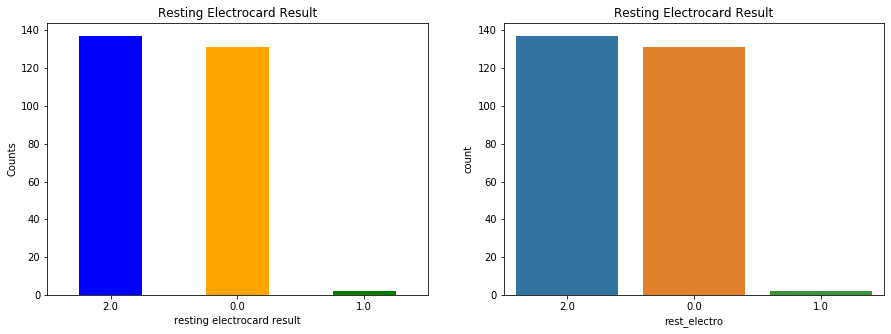

In [15]:
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
# Showing counts
print("counts \n" + str(df['rest_electro'].value_counts()))
# Showing percentages
print("\npercentages \n" + str(df['rest_electro'].value_counts(normalize=True).mul(100)))
# Creating a figure with two subplots in the same row
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
df['rest_electro'].value_counts().plot(kind='bar',color=['blue','orange','green'])
plt.ylabel('Counts')
plt.xlabel('resting electrocard result')
plt.title("Resting Electrocard Result")
plt.xticks(rotation='horizontal')
plt.subplot(1, 2, 2)
sns.countplot(x='rest_electro', data=df,order=df['rest_electro'].unique()).set_title("Resting Electrocard Result")
plt.show();

The frequency distribution shows that there are 137 patients showing probable or definite left ventricular hypertrophy by Estes' criteria, 131 patients whose resting electrocardiographic result is normal, 2 having to have ST-T wave abnormality.


### Attribute 8:  max heart rate
summary statistics for  max heart rate attribute by providing a histogram graph

				"Statistical Summary & Visualisation"

count    270.000000
mean     149.677778
std       23.165717
min       71.000000
25%      133.000000
50%      153.500000
75%      166.000000
max      202.000000
Name: max_heart_rate, dtype: float64


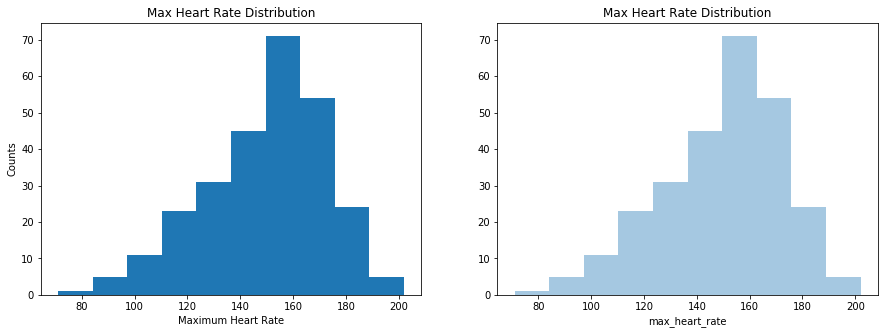

In [16]:
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
print(df['max_heart_rate'].describe())
# Creating a figure with two subplots in the same row
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
# define the plot you want to generate
plt.hist(df['max_heart_rate'])
#plt.subplot(111)
# define a title for the plot
plt.title('Max Heart Rate Distribution')
# define the number of bins for the histogram + which plot axis they will
# # Matplotlib
plt.ylabel('Counts')
plt.xlabel('Maximum Heart Rate')
plt.locator_params(nbins=10, axis = 'x')
plt.subplot(1, 2, 2)
# max heart rate
sns.distplot(df['max_heart_rate'],kde=False, bins = 10).set_title("Max Heart Rate Distribution")
plt.show();

This histogram shows an idea of the distribution of the max heart rate achieved (in beats per minute) across all patients. The highest frequency is between 155 and 160 and the distribution is negatively skewed. 
According to the statistics, the mean is 149.67, the max value is 202 and the lowest 71 beats per minute.



### Attribute 9:  exercise induced angina 
summary statistics for exercise induced angina attribute by providing a bar graph

				"Statistical Summary & Visualisation"

counts 
No     181
Yes     89
Name: ex_ind_chest_pain, dtype: int64

percentages 
No     67.037037
Yes    32.962963
Name: ex_ind_chest_pain, dtype: float64


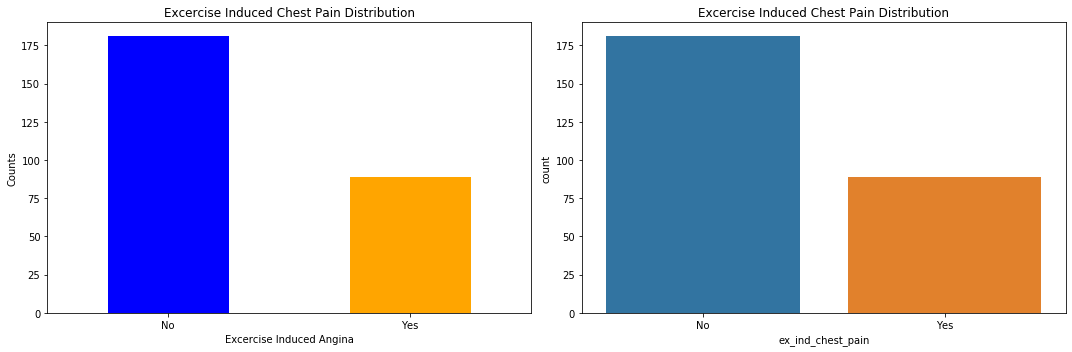

In [17]:
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
# Showing counts
print("counts \n" + str(df['ex_ind_chest_pain'].value_counts()))
# Showing percentages
print("\npercentages \n" + str(df['ex_ind_chest_pain'].value_counts(normalize=True).mul(100)))
# Creating a figure with two subplots in the same row
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
df['ex_ind_chest_pain'].value_counts().plot(kind='bar',color=['blue','orange'])
plt.ylabel('Counts')
plt.xlabel('Excercise Induced Angina')
plt.title("Excercise Induced Chest Pain Distribution")
plt.xticks(rotation='horizontal')
plt.subplot(1, 2, 2)
sns.countplot(x='ex_ind_chest_pain', data=df).set_title("Excercise Induced Chest Pain Distribution")
fig.tight_layout()
plt.show();

The frequency distribution shows that there are 181 patients that had chest pain while doing exercise representing 67% of the total and 89 that did not have any chest pain.

### Attribute 10:  Old Peak 
summary statistics for Old Peak  attribute by providing a Histogram graph

				"Statistical Summary & Visualisation"

count    270.00000
mean       1.05000
std        1.14521
min        0.00000
25%        0.00000
50%        0.80000
75%        1.60000
max        6.20000
Name: oldpeak, dtype: float64


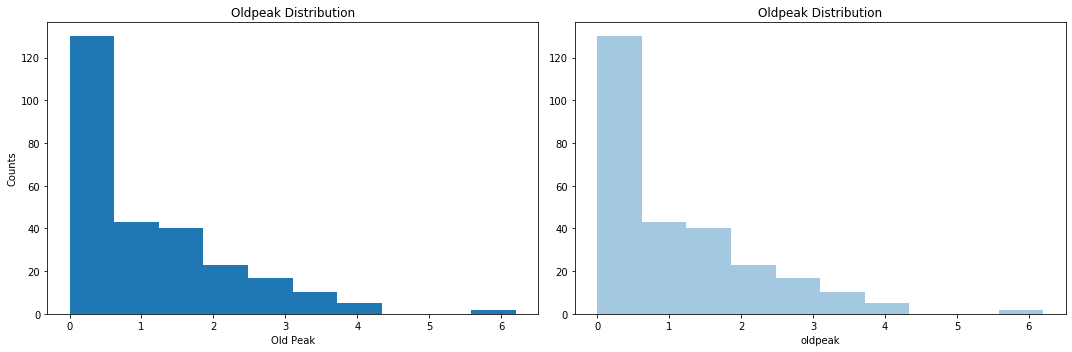

In [18]:
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
# oldpeak
print(df['oldpeak'].describe())
# Creating a figure with two subplots in the same row
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(df['oldpeak'])
#plt.subplot(111)
# define a title for the plot
plt.ylabel('Counts')
plt.xlabel('Old Peak')
plt.title('Oldpeak Distribution')
# define the number of bins for the histogram + which plot axis they will
# # Matplotlib
plt.locator_params(nbins=10, axis = 'x')
plt.subplot(1, 2, 2)
sns.distplot(df['oldpeak'],kde=False, bins = 10).set_title("Oldpeak Distribution")
fig.tight_layout()
plt.show();

This histogram shows an idea of the distribution of the old peak (ST depression induced by exercise relative to rest) across all patients with the highest frequency between 0 and 0.5. The distribution is "Positively Skewed" and according to the statistics, it looks like the mean is 1.05.

### Attribute 11: slope of peak
summary statistics for Old Peak  attribute by providing a bar graph

				"Statistical Summary & Visualisation"

counts 
upsloping      130
flat           122
downsloping     18
Name: peak_slope, dtype: int64

percentages 
upsloping      48.148148
flat           45.185185
downsloping     6.666667
Name: peak_slope, dtype: float64


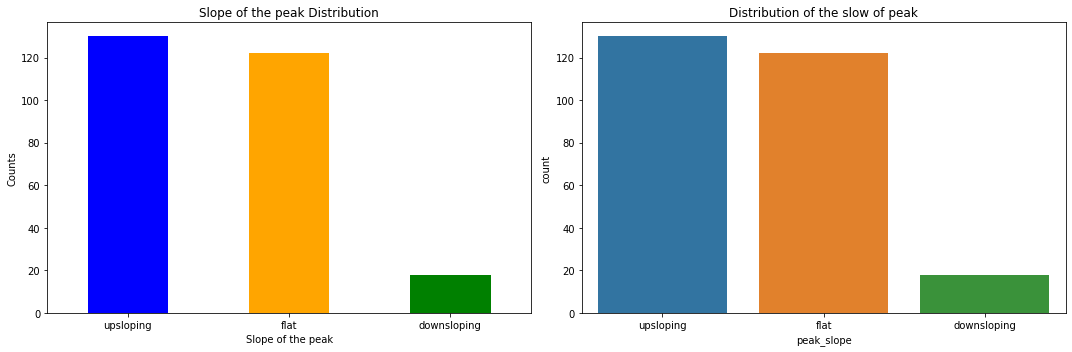

In [19]:
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
# Showing counts
print("counts \n" + str(df['peak_slope'].value_counts()))
# Showing percentages
print("\npercentages \n" + str(df['peak_slope'].value_counts(normalize=True).mul(100)))
# Creating a figure with two subplots in the same row
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
df['peak_slope'].value_counts().plot(kind='bar',color=['blue','orange','green'])
plt.ylabel('Counts')
plt.xlabel('Slope of the peak')
plt.title("Slope of the peak Distribution")
plt.xticks(rotation='horizontal')
plt.subplot(1, 2, 2)
sns.countplot(x='peak_slope', data=df, order = sorted(df['peak_slope'].unique(),reverse=True)).set_title("Distribution of the slow of peak")
fig.tight_layout()
plt.show();

The frequency distribution tells us that the slope of the peak is ranked in descending order as follows: upsloping/flat/downsloping. So 'upsloping' is the category with the most amount of records with 130, representing 48% of the data, and 'downsloping' is the one with the least amount of occurrences with 18.

### Attribute 12: number_vessels
Summary statistics for number_vessels attribute by providing a Bar graph

				"Statistical Summary & Visualisation"

counts 
0.0    160
1.0     58
2.0     33
3.0     19
Name: vessels, dtype: int64

percentages 
0.0    59.259259
1.0    21.481481
2.0    12.222222
3.0     7.037037
Name: vessels, dtype: float64


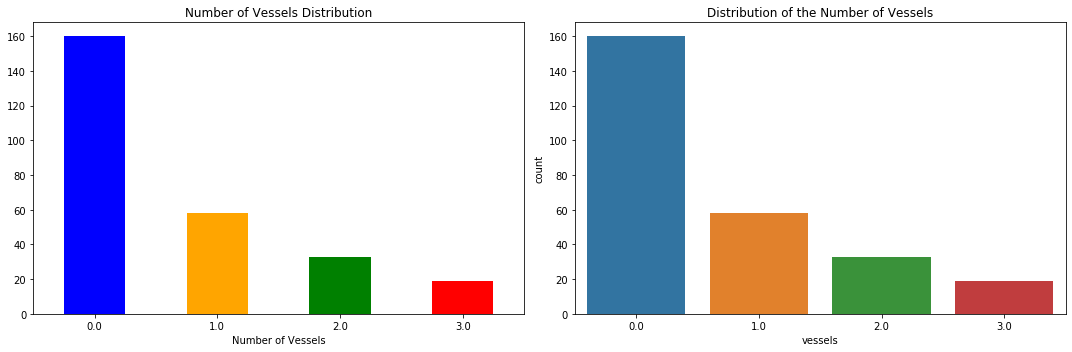

In [20]:
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
# Showing counts
print("counts \n" + str(df['vessels'].value_counts()))
# Showing percentages
print("\npercentages \n" + str(df['vessels'].value_counts(normalize=True).mul(100)))
# Creating a figure with two subplots in the same row
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
df['vessels'].value_counts().plot(kind='bar',color=['blue','orange','green','red'])
plt.xlabel('Number of Vessels')
plt.title("Number of Vessels Distribution")
plt.xticks(rotation='horizontal')
plt.subplot(1, 2, 2)
sns.countplot(x='vessels', data=df).set_title("Distribution of the Number of Vessels")
fig.tight_layout()
plt.show();

The frequency distribution tells us that the number of major vessels is ranked in descending order as follows: 0/1/2/3. So '0' is the category with the most amount of records with 160 representing almost 60% of the data and '3' the one with the least amount of occurrences with only 19.

### Attribute 13: thal
Summary statistics for thal  attribute by providing a bar graph

				"Statistical Summary & Visualisation"

counts 
normal               152
reversable defect    104
fixed defect          14
Name: thal, dtype: int64

percentages 
normal               56.296296
reversable defect    38.518519
fixed defect          5.185185
Name: thal, dtype: float64


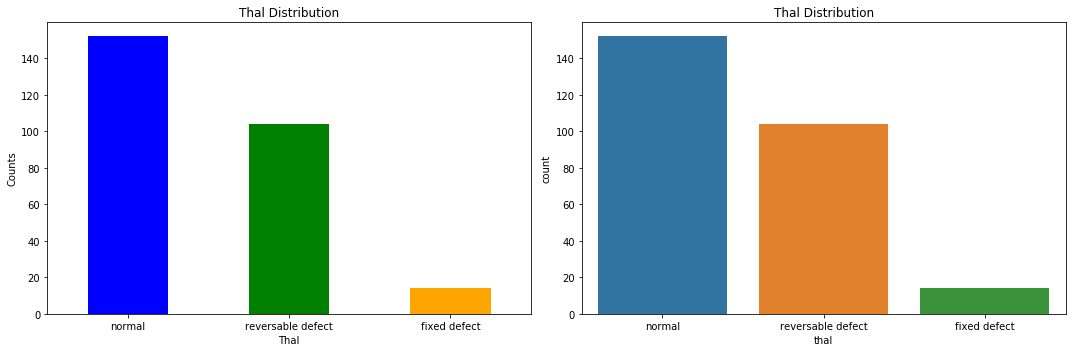

In [21]:
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
# Showing counts
print("counts \n" + str(df['thal'].value_counts()))
# Showing percentages
print("\npercentages \n" + str(df['thal'].value_counts(normalize=True).mul(100)))
# Creating a figure with two subplots in the same row
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
df['thal'].value_counts().plot(kind='bar',color=['blue','green','orange'])
plt.ylabel('Counts')
plt.xlabel('Thal')
plt.title("Thal Distribution")
plt.xticks(rotation='horizontal')
plt.subplot(1, 2, 2)
sns.countplot(x='thal', data=df,order=df['thal'].unique()).set_title("Thal Distribution")
fig.tight_layout()
plt.show();

The frequency distribution of the thal attribute (results of thallium stress test measuring blood flow to the heart) tells us that the highest number of cases with 152 is in result normal representing 56% of the data, followed by 104 cases with a reversible defect and finally 14 with the fixed defect.


### Attribute 14: disease
summary statistics for disease attribute by providing a bar graph

				"Statistical Summary & Visualisation"

counts 
No     150
Yes    120
Name: disease, dtype: int64

percentages 
No     55.555556
Yes    44.444444
Name: disease, dtype: float64


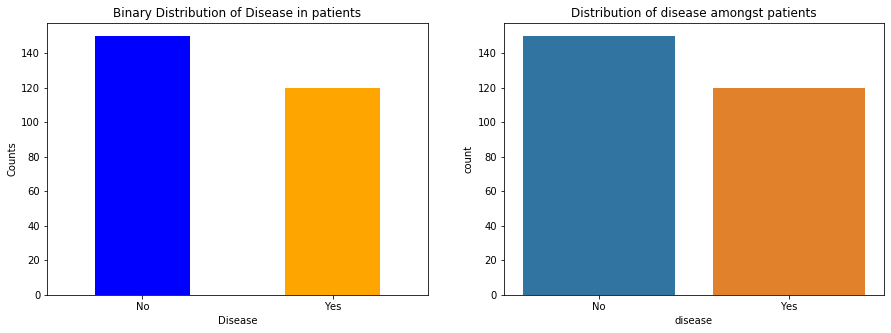

In [22]:
print("\t\t\t\t\"Statistical Summary & Visualisation\"\n")
# Showing counts
print("counts \n" + str(df['disease'].value_counts()))
# Showing percentages
print("\npercentages \n" + str(df['disease'].value_counts(normalize=True).mul(100)))
# Creating a figure with two subplots in the same row
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
df['disease'].value_counts().plot(kind='bar',color=['blue','orange'])
plt.ylabel('Counts')
plt.xlabel('Disease')
plt.title("Binary Distribution of Disease in patients")
plt.xticks(rotation='horizontal')
plt.subplot(1, 2, 2)
sns.countplot(x='disease', data=df,order=['No','Yes']).set_title("Distribution of disease amongst patients")
plt.show();

The frecuency distribution shows that over the 270 patients 120 faced a heart disease, representing 45% of the data whereas 150 did not.

In [23]:
# Reseting the Plotting Memory
plt.clf();

<Figure size 432x288 with 0 Axes>

### Part 4: Inference

#### Who are the people that are the susceptable to heart diseases the most ? and How do men and women differ in that regard ?
The following are our points of interest:
- Might it be the age ?
- Might it be gender ?
- Might it be because of stress ?
- Might it be because of cholesterol ?
- Might be other cause?
- What did we learn

First we will work with the dataframes below:
 - disease_yes: patients that do have a heart disease
     - disease_yes_male: men that have a disease
     - disease_yes_female: woman that have a disease

###### building some statistics and some graphs based on these dataframes

In [24]:
print("\t\t\t\"The Following provides the Count of the Number of Men and Women\"")
disease_yes=df[df.iloc[:,13]=='Yes']# disease = Yes
disease_yes_male=disease_yes[disease_yes.iloc[:,1]=='Male'] #male with disease
disease_yes_female=disease_yes[disease_yes.iloc[:,1]=='Female'] #female with disease
# Showing counts
print("counts \n" + str(disease_yes['sex'].value_counts()))
print("\t\t\t\"The Following provides the Percentages between Men and Women\"")
# Showing percentages
print("\npercentages \n" + str(disease_yes['sex'].value_counts(normalize=True).mul(100)))

			"The Following provides the Count of the Number of Men and Women"
counts 
Male      100
Female     20
Name: sex, dtype: int64
			"The Following provides the Percentages between Men and Women"

percentages 
Male      83.333333
Female    16.666667
Name: sex, dtype: float64


###### It seems that there are alot more male patients than female patients

In [25]:
print("\t\t\t\"The Following provides the Statistical Summary for Men and Women with Heart diseases\"\nMen:\n{0}\n\nWomen:\n{1}".format(disease_yes_male.age.describe(),disease_yes_female.age.describe()))

			"The Following provides the Statistical Summary for Men and Women with Heart diseases"
Men:
count    100.000000
mean      56.040000
std        8.487567
min       35.000000
25%       50.750000
50%       57.500000
75%       61.000000
max       77.000000
Name: age, dtype: float64

Women:
count    20.000000
mean     59.350000
std       5.254322
min      43.000000
25%      57.500000
50%      61.000000
75%      62.000000
max      66.000000
Name: age, dtype: float64


				"Histogram of the women and men with Heart diseases"

					    'A) Using Matplotlib.py'



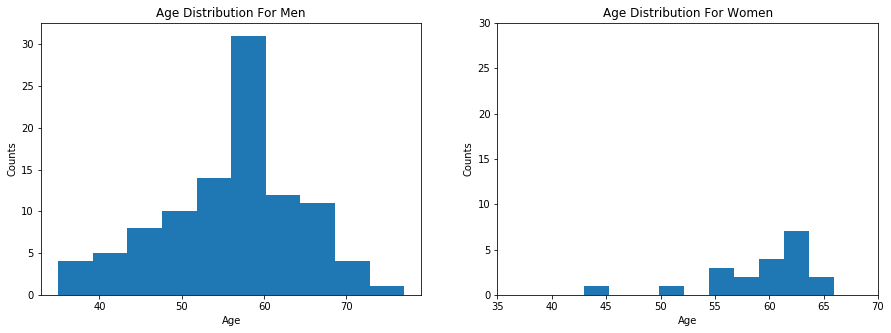

					    'B) Using Seaborn'



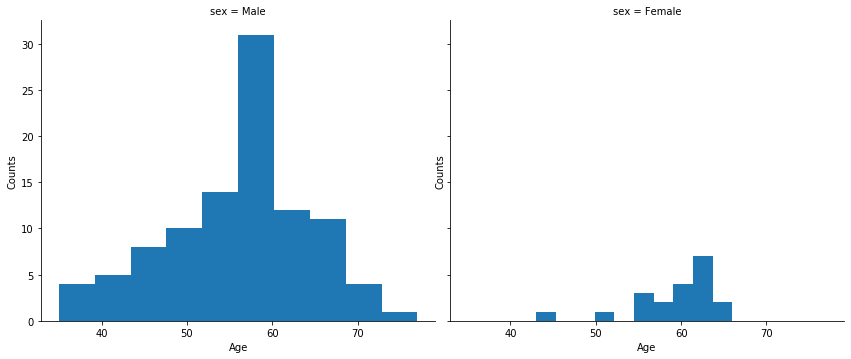

In [26]:
print("\t\t\t\t\"Histogram of the women and men with Heart diseases\"\n")

# Creating a figure with two subplots in the same row
# Matplotlib
print("\t\t\t\t\t    \'A) Using Matplotlib.py\'\n")
fig = plt.figure(figsize=(15,5))
plt.subplot(1, 2, 1)
plt.hist(disease_yes_male["age"])
# define a title for the plot
plt.ylabel('Counts')
plt.xlabel('Age')
plt.title('Age Distribution For Men')
# define the number of bins for the histogram + which plot axis they will
#plt.locator_params(nbins=10, axis = 'x')
plt.subplot(1, 2, 2)
plt.hist(disease_yes_female["age"])
# define a title for the plot
plt.ylabel('Counts')
plt.xlabel('Age')
plt.ylim([0,30])
plt.xlim([35,70])
plt.title('Age Distribution For Women')
plt.show();

# In seaborn
print("\t\t\t\t\t    \'B) Using Seaborn\'\n")
g = sns.FacetGrid(disease_yes, col='sex',height=5.1, aspect=1.15);
g.map(plt.hist, "age")
g.set(xlabel='Age', ylabel='Counts')
fig.tight_layout()
plt.show();


				   "Box Plot of Ages Grouped by Sex"

A) Matplotlib.py



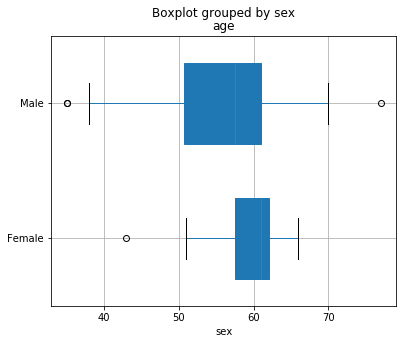

B) Seaborn



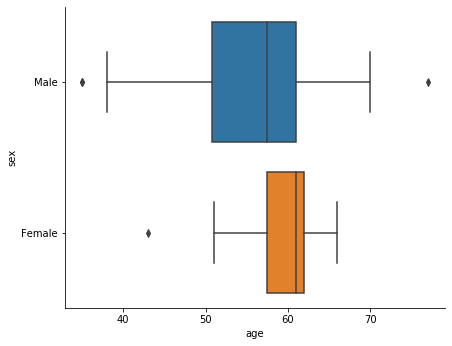

In [27]:
print("\t\t\t\t   \"Box Plot of Ages Grouped by Sex\"\n")
#A) Matplotlib
print("A) Matplotlib.py\n")
disease_yes.boxplot(column='age', by='sex',vert=False,widths = 0.6,patch_artist = True,figsize=(6,5));
plt.show();

#B) Seaborn
print("B) Seaborn\n")
sns.catplot(x='age', y='sex', kind='box',data=disease_yes,height=4.91,aspect=1.3);
plt.show();

The statistics show that over the 120 patients that have heart disease 83% are men with a mean age of 56 years and 17% women with a mean age of 59 years. Also, we can learn from the graphs that, in general, men are more vulnerable especially between the ages of 57/58 but generally on a wider range of ages with an interquartile range (IQR=Q3-Q1) of 10 whereas for woman the IQR is only 5.
Also, we know that in the US, menopause in a woman is around the age of Fifty-one [16], and almost every woman with heart disease in our dataset are older than 51. On the other hand, men are more prone to heart disease before that age. 



The following statistics and charts take a step further into understanding what the differences are between the genders and the cholesterol level as well as chest pain to build our insights. Normally, the liver makes all the cholesterol the body needs. But cholesterol also enters your body from food, such as animal-based foods like milk, eggs, and meat. Too much cholesterol in your body is a risk factor for heart disease [17].


Let's Look at the Numbers First

In [28]:
print("The Cholesterol Statistical Summary for Men:\n{0}\n\nThe Cholesterol Statistical Summary for Women:\n{1}".format(disease_yes_male.cholest.describe(),disease_yes_female.cholest.describe()))

The Cholesterol Statistical Summary for Men:
count    100.000000
mean     249.760000
std       42.805201
min      149.000000
25%      218.750000
50%      253.500000
75%      282.000000
max      353.000000
Name: cholest, dtype: float64

The Cholesterol Statistical Summary for Women:
count     20.000000
mean     290.000000
std       58.687397
min      164.000000
25%      255.750000
50%      291.000000
75%      321.000000
max      409.000000
Name: cholest, dtype: float64


Now Let's Visualize it

					    'A) Using Matplotlib.py'



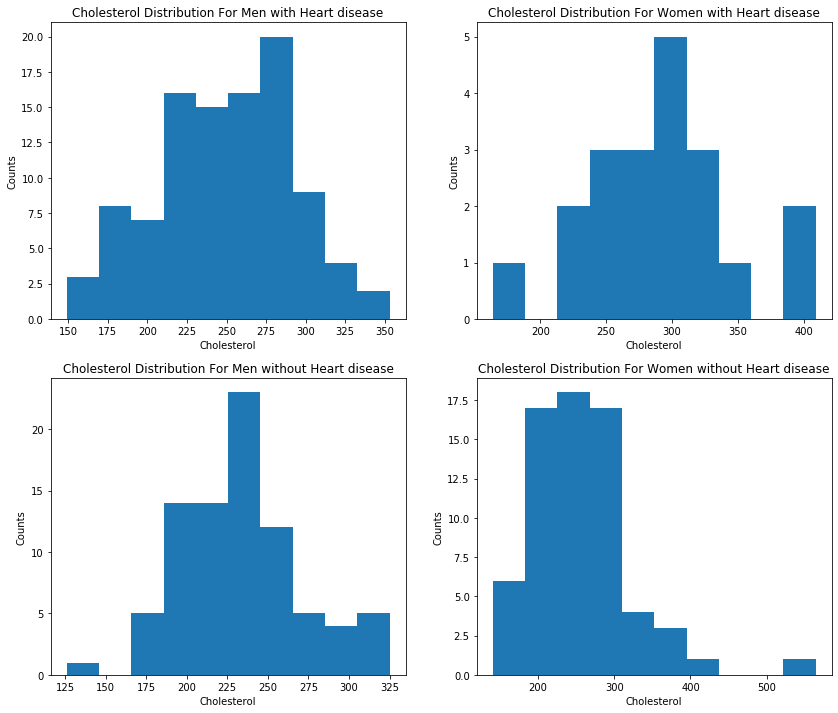

					    'A) Seaborn.py'



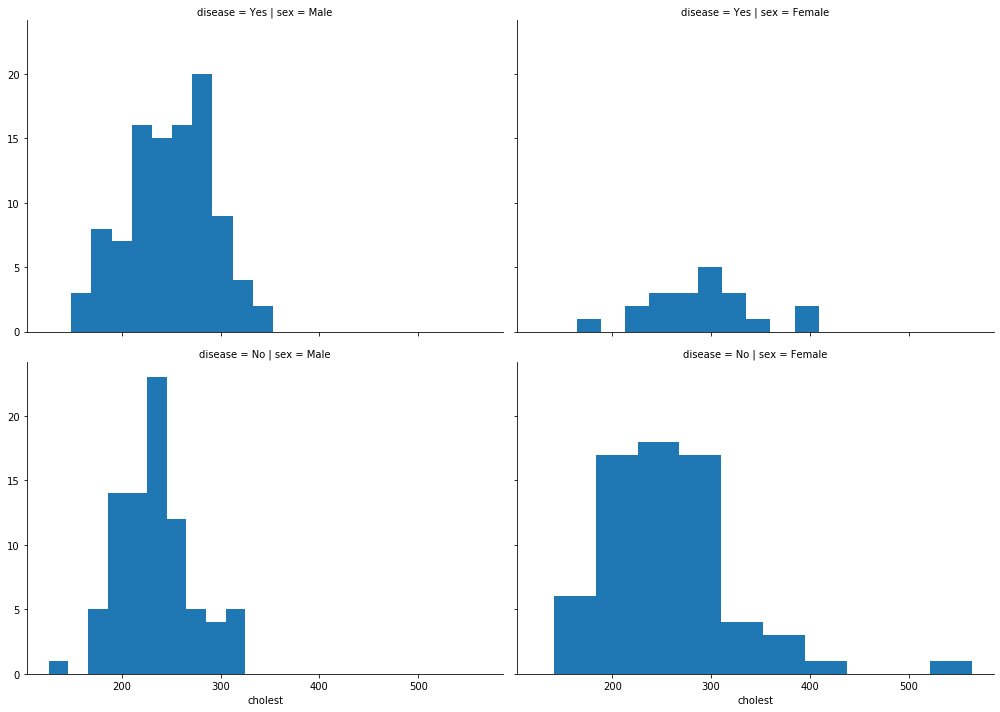

In [29]:
# Printing information
print("\t\t\t\t\t    \'A) Using Matplotlib.py\'\n")
fig = plt.figure(figsize=(14,12))
plt.subplot(2, 2, 1)
plt.hist(disease_yes_male["cholest"])
# define a title for the plot
plt.ylabel('Counts')
plt.xlabel('Cholesterol')
plt.title('Cholesterol Distribution For Men with Heart disease')
# define the number of bins for the histogram + which plot axis they will
plt.subplot(2, 2, 2)
plt.hist(disease_yes_female["cholest"])
# define a title for the plot
plt.ylabel('Counts')
plt.xlabel('Cholesterol')
plt.title('Cholesterol Distribution For Women with Heart disease')
# here is the 3rd plot
plt.subplot(2, 2, 3)
plt.hist(disease_no_male["cholest"])
#plt.subplot(111)
# define a title for the plot
plt.ylabel('Counts')
plt.xlabel('Cholesterol')
plt.title('Cholesterol Distribution For Men without Heart disease')
# define the number of bins for the histogram + which plot axis they will
plt.subplot(2, 2, 4)
plt.hist(disease_no_female["cholest"])
# define a title for the plot
plt.ylabel('Counts')
plt.xlabel('Cholesterol')
plt.title('Cholesterol Distribution For Women without Heart disease')
#printing the subplots.
plt.show();
# Now for Seaborn we only have to write just this line.
# Printing information.
print("\t\t\t\t\t    \'A) Seaborn.py\'\n")
g = sns.FacetGrid(df, col='sex', row='disease',height=5, aspect=1.4)
g.map(plt.hist, "cholest")
fig.tight_layout()
plt.show();


###### -Let's Have it visualized from a different prespective

		-Box Plots of Ages Grouped by Sex- 


A) Matplotlib.py
		 'Patients with heart disease'



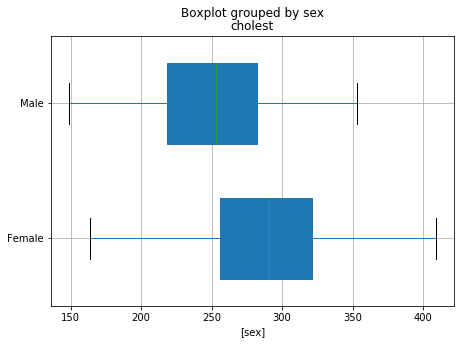

		 'Patients without heart disease'



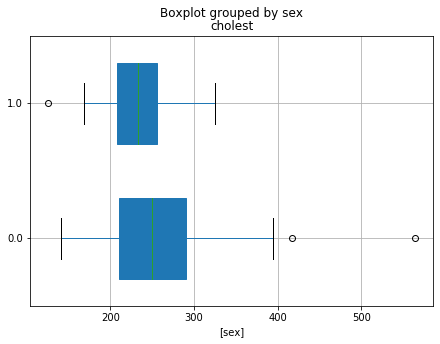

B) Seaborn



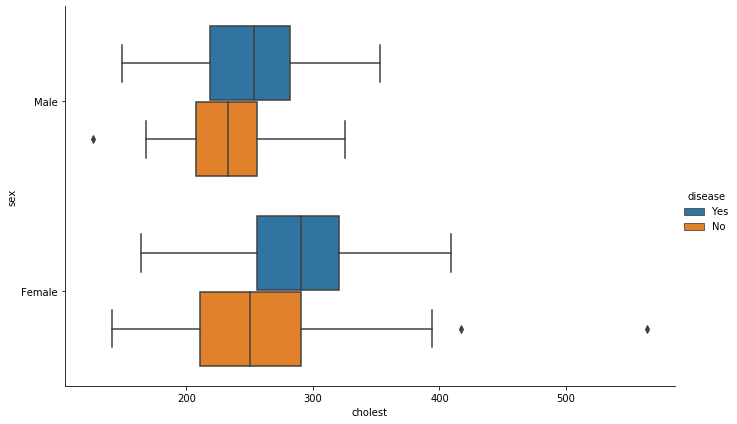

In [30]:
print("\t\t-Box Plots of Ages Grouped by Sex- \n\n")
#A) Matplotlib
print("A) Matplotlib.py")
print("\t\t \'Patients with heart disease\'\n")
box1=disease_yes.boxplot(column=['cholest'], by=['sex'],vert=False,widths = 0.6,patch_artist = True,figsize=(7,5))
plt.show();
print("\t\t \'Patients without heart disease\'\n")
box2=disease_no.boxplot(column=['cholest'], by=['sex'],vert=False,widths = 0.6,patch_artist = True,figsize=(7,5))
plt.show();

#B) Seaborn
print("B) Seaborn\n")
sns.catplot(x='cholest', y='sex', kind='box', hue='disease',height= 6, aspect=1.6,data=df);
fig.tight_layout()
plt.show();

Up to 200 milligrams of cholesterol per deciliter (mg/dL) are considered desirable for adults. A reading between 200 and 239 mg/dL is considered borderline high and a reading of 240 mg/dL and above is considered high [15]
Overall in the previous charts, we can see that the level of cholesterol is mostly above 200 mg/dL but it seems that for men that have a disease the values tend to be centralized around 250 while in females data is centralized around 290, and it looks like for men heart problems starts to appear at lower cholesterol values (slightly above 200 mg/dL) which would mean that in general woman's heart could be more "resistant" to high levels of cholesterol

So what?
- Well, men need to make a lot of changes to their diet, while women need to do improve it just a little bit. and the reason for that is a high level of cholesterol leeds to narrow arteries [17]

Now we will analyze the results of the 'thal' stress test and compare it to the patient's chest pain type (if there is any). The purpose is to understand if there is any symptom, such as chest pain, associated with a presense of a disease.

We will provide graphs in matplotlib, and to build them, we will define separate datasets for each group of patients that do not have the disease, male and female.
The algorithm define a plot with 4 subplots, and we define lists that will contain each bar counts/height for each chest pain type on the individual 'thal' results.

Then we will build the same graphs using seaborn.

In [31]:
disease_no=df[df.iloc[:,13]=='No']# disease = No
disease_no_male=disease_no[disease_no.iloc[:,1]=='Male'] #male without disease
disease_no_female=disease_no[disease_no.iloc[:,1]=='Female'] #female without disease

					    'A) Using Matplotlib.py'



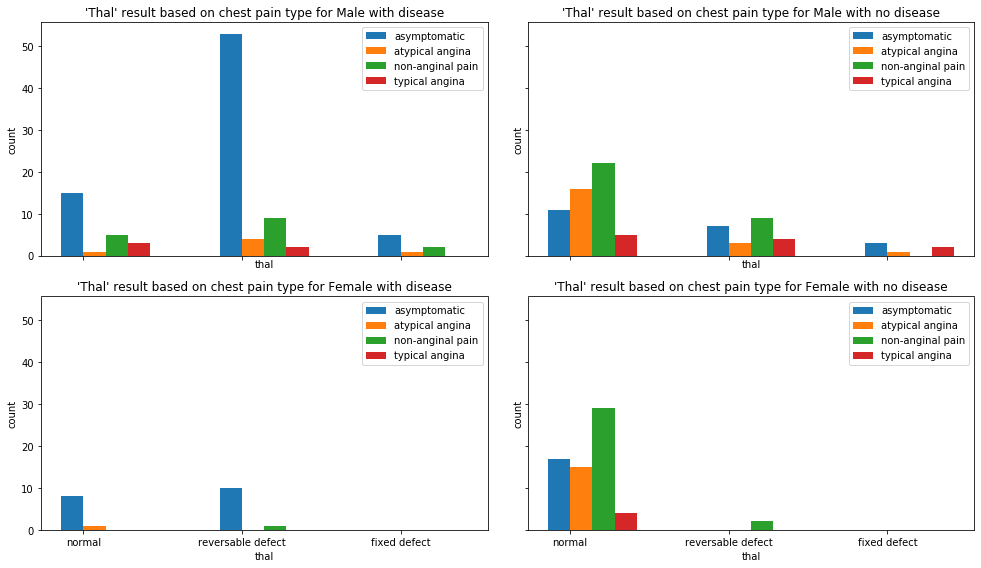

In [32]:
#Bar Graph
# Matplotlib
print("\t\t\t\t\t    \'A) Using Matplotlib.py\'\n")

fig, axs = plt.subplots(2, 2, figsize=(14, 8), sharex=True, sharey=True)
x = np.arange(len(disease_yes_male.thal.unique()))
thal_unique=disease_yes_male.thal.unique()
chest_pain_unique = disease_yes_male.chest_pain_tp.unique()

# Define bar width. We'll use this to offset the 2nd, 3er and 4th bar.
bar_width = 0.14

#lists to store bar height of upper left graph, male yes (shorcut my)
my1=[]
my2=[]
my3=[]
my4=[]

#lists to store bar height of upper right graph, male yes (shorcut mn)
mn1=[]
mn2=[]
mn3=[]
mn4=[]

#lists to store bar height of lower left graph, female yes (shortcut fy)
fy1=[]
fy2=[]
fy3=[]
fy4=[]

#lists to store bar height of lower right graph, female no (shortcut fn)
fn1=[]
fn2=[]
fn3=[]
fn4=[]

for i, category in enumerate(thal_unique):
    #disease yes male
    my1.append(disease_yes_male.loc[(disease_yes_male['thal'] == category) & (disease_yes_male['chest_pain_tp'] == chest_pain_unique[0]), :]["sex"].count())
    my2.append(disease_yes_male.loc[(disease_yes_male['thal'] == category) & (disease_yes_male['chest_pain_tp'] == chest_pain_unique[1]), :]["sex"].count())
    my3.append(disease_yes_male.loc[(disease_yes_male['thal'] == category) & (disease_yes_male['chest_pain_tp'] == chest_pain_unique[2]), :]["sex"].count())
    my4.append(disease_yes_male.loc[(disease_yes_male['thal'] == category) & (disease_yes_male['chest_pain_tp'] == chest_pain_unique[3]), :]["sex"].count())
    
    #disease no male
    mn1.append(disease_no_male.loc[(disease_no_male['thal'] == category) & (disease_no_male['chest_pain_tp'] == chest_pain_unique[0]), :]["sex"].count())
    mn2.append(disease_no_male.loc[(disease_no_male['thal'] == category) & (disease_no_male['chest_pain_tp'] == chest_pain_unique[1]), :]["sex"].count())
    mn3.append(disease_no_male.loc[(disease_no_male['thal'] == category) & (disease_no_male['chest_pain_tp'] == chest_pain_unique[2]), :]["sex"].count())
    mn4.append(disease_no_male.loc[(disease_no_male['thal'] == category) & (disease_no_male['chest_pain_tp'] == chest_pain_unique[3]), :]["sex"].count())
    
    #disease yes female
    fy1.append(disease_yes_female.loc[(disease_yes_female['thal'] == category) & (disease_yes_female['chest_pain_tp'] == chest_pain_unique[0]), :]["sex"].count())
    fy2.append(disease_yes_female.loc[(disease_yes_female['thal'] == category) & (disease_yes_female['chest_pain_tp'] == chest_pain_unique[1]), :]["sex"].count())
    fy3.append(disease_yes_female.loc[(disease_yes_female['thal'] == category) & (disease_yes_female['chest_pain_tp'] == chest_pain_unique[2]), :]["sex"].count())
    fy4.append(disease_yes_female.loc[(disease_yes_female['thal'] == category) & (disease_yes_female['chest_pain_tp'] == chest_pain_unique[3]), :]["sex"].count())
    
    #disease no female
    fn1.append(disease_no_female.loc[(disease_no_female['thal'] == category) & (disease_no_female['chest_pain_tp'] == chest_pain_unique[0]), :]["sex"].count())
    fn2.append(disease_no_female.loc[(disease_no_female['thal'] == category) & (disease_no_female['chest_pain_tp'] == chest_pain_unique[1]), :]["sex"].count())
    fn3.append(disease_no_female.loc[(disease_no_female['thal'] == category) & (disease_no_female['chest_pain_tp'] == chest_pain_unique[2]), :]["sex"].count())
    fn4.append(disease_no_female.loc[(disease_no_female['thal'] == category) & (disease_no_female['chest_pain_tp'] == chest_pain_unique[3]), :]["sex"].count())

    
#Now we assign each lists values to the height of each subplot graph
    
# We define one bar for each chest_pain_tp in the upper left graph
b1 = axs[0,0].bar(x,my1, width=bar_width, label=chest_pain_unique[0])
b2 = axs[0,0].bar(x+bar_width,my2, width=bar_width, label=chest_pain_unique[1])
b3 = axs[0,0].bar(x+(bar_width*2),my3, width=bar_width, label=chest_pain_unique[2])
b4 = axs[0,0].bar(x+(bar_width*3),my4, width=bar_width, label=chest_pain_unique[3])

# We define one bar for each chest_pain_tp in the upper right graph
b1 = axs[0,1].bar(x,mn1, width=bar_width, label=chest_pain_unique[0])
b2 = axs[0,1].bar(x+bar_width,mn2, width=bar_width, label=chest_pain_unique[1])
b3 = axs[0,1].bar(x+(bar_width*2),mn3, width=bar_width, label=chest_pain_unique[2])
b4 = axs[0,1].bar(x+(bar_width*3),mn4, width=bar_width, label=chest_pain_unique[3])

# We define one bar for each chest_pain_tp in the upper left graph
b1 = axs[1,0].bar(x,fy1, width=bar_width, label=chest_pain_unique[0])
b2 = axs[1,0].bar(x+bar_width,fy2, width=bar_width, label=chest_pain_unique[1])
b3 = axs[1,0].bar(x+(bar_width*2),fy3, width=bar_width, label=chest_pain_unique[2])
b4 = axs[1,0].bar(x+(bar_width*3),fy4, width=bar_width, label=chest_pain_unique[3])

# We define one bar for each chest_pain_tp in the upper right graph
b1 = axs[1,1].bar(x,fn1, width=bar_width, label=chest_pain_unique[0])
b2 = axs[1,1].bar(x+bar_width,fn2, width=bar_width, label=chest_pain_unique[1])
b3 = axs[1,1].bar(x+(bar_width*2),fn3, width=bar_width, label=chest_pain_unique[2])
b4 = axs[1,1].bar(x+(bar_width*3),fn4, width=bar_width, label=chest_pain_unique[3])

axs[0,0].legend()
axs[0,1].legend()
axs[1,0].legend()
axs[1,1].legend()

# Fix the x-axes.
axs[0,0].set_xticks(x + bar_width / 2)
axs[0,0].set_xticklabels(thal_unique)
axs[0,0].set_title("'Thal' result based on chest pain type for Male with disease")
axs[0,1].set_xticks(x + bar_width / 2)
axs[0,1].set_xticklabels(thal_unique)
axs[0,1].set_title("'Thal' result based on chest pain type for Male with no disease")
axs[1,0].set_xticks(x + bar_width / 2)
axs[1,0].set_xticklabels(thal_unique)
axs[1,0].set_title("'Thal' result based on chest pain type for Female with disease")
axs[1,1].set_xticks(x + bar_width / 2)
axs[1,1].set_xticklabels(thal_unique)
axs[1,1].set_title("'Thal' result based on chest pain type for Female with no disease")
for ax in axs.flat:
    ax.set(xlabel='thal', ylabel='count')
fig.tight_layout()
plt.show();

					    'B) Using Seaborn'



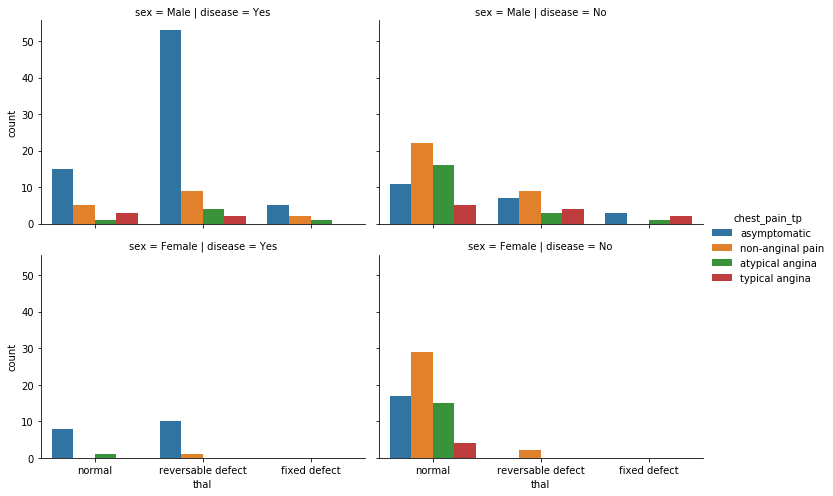

In [33]:
#Seaborn
print("\t\t\t\t\t    \'B) Using Seaborn\'\n")
sns.catplot(x="thal", hue="chest_pain_tp", data=df, col='disease', kind="count", row='sex',height= 3.5, aspect= 1.4, order=df['thal'].unique());

In the previous Chart we delve more into the specifics of what type of chest problems affects each gender when having a disease:
- Men are prone to all sorts of chest pain but there seem to have to be a spike in asymptotic chest pain, so in general heart disease can be very silent for both, men and woman, so it is a good habit to do the thal test to find out a potential hidden disease.
- Women that don't have a disease are more likely to develop non-anginal pain

Finally we want to analyze the impact of the old peak ( ST depression induced by exercise relative to rest [4]) and its slope. For matplotlib the approach is similar to the previous graph, we will build one list for each slope_peak mean value on each group to build the comparison between males and females with disease and without it.

In [34]:
plt.clf();

<Figure size 432x288 with 0 Axes>

					    'A) Using Matplotlib.py'



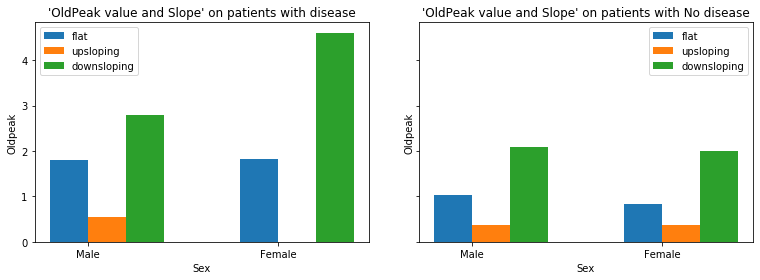

					    'B) Using Seaborn'



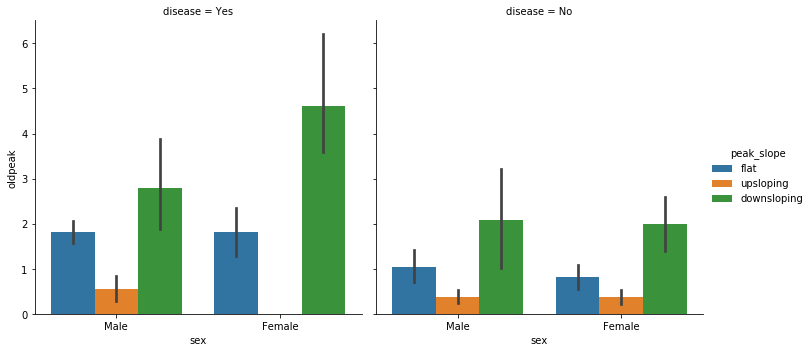

In [35]:
#Bar Graph
# Matplotlib
print("\t\t\t\t\t    \'A) Using Matplotlib.py\'\n")

fig, axs = plt.subplots(1, 2, figsize=(11, 4), sharex=True, sharey=True)
x = np.arange(len(df.sex.unique()))
sex_unique=df.sex.unique()
peak_slope_unique = df.peak_slope.unique()

# Define bar width. We'll use this to offset the 2nd, 3er and 4th bar.
bar_width = 0.2

#lists to store bar height of left graph, disease yes (ds)
ds1=[]
ds2=[]
ds3=[]

#lists to store bar height of right graph, disease no (dn)
dn1=[]
dn2=[]
dn3=[]


for i, category in enumerate(sex_unique):
    #disease yes
    ds1.append(disease_yes.loc[(disease_yes['sex'] == category) & (disease_yes['peak_slope'] == peak_slope_unique[0]), :]["oldpeak"].mean())
    ds2.append(disease_yes.loc[(disease_yes['sex'] == category) & (disease_yes['peak_slope'] == peak_slope_unique[1]), :]["oldpeak"].mean())
    ds3.append(disease_yes.loc[(disease_yes['sex'] == category) & (disease_yes['peak_slope'] == peak_slope_unique[2]), :]["oldpeak"].mean())
    
    #disease no
    dn1.append(disease_no.loc[(disease_no['sex'] == category) & (disease_no['peak_slope'] == peak_slope_unique[0]), :]["oldpeak"].mean())
    dn2.append(disease_no.loc[(disease_no['sex'] == category) & (disease_no['peak_slope'] == peak_slope_unique[1]), :]["oldpeak"].mean())
    dn3.append(disease_no.loc[(disease_no['sex'] == category) & (disease_no['peak_slope'] == peak_slope_unique[2]), :]["oldpeak"].mean())
    
#Now we assign each lists values to the height of each subplot graph
  
# We define one bar for each chest_pain_tp in the upper left graph
b1 = axs[0].bar(x,ds1, width=bar_width, label=peak_slope_unique[0])
b2 = axs[0].bar(x+bar_width,ds2, width=bar_width, label=peak_slope_unique[1])
b3 = axs[0].bar(x+(bar_width*2),ds3, width=bar_width, label=peak_slope_unique[2])

# We define one bar for each chest_pain_tp in the upper right graph
b1 = axs[1].bar(x,dn1, width=bar_width, label=peak_slope_unique[0])
b2 = axs[1].bar(x+bar_width,dn2, width=bar_width, label=peak_slope_unique[1])
b3 = axs[1].bar(x+(bar_width*2),dn3, width=bar_width, label=peak_slope_unique[2])

axs[0].legend()
axs[1].legend()

# Set common labels
plt.ylabel('Oldpeak')


# Fix the x-axes.
axs[0].set_xticks(x + bar_width / 2)
axs[0].set_xticklabels(sex_unique)
axs[0].set_title("'OldPeak value and Slope' on patients with disease")
axs[1].set_xticks(x + bar_width / 2)
axs[1].set_xticklabels(sex_unique)
axs[1].set_title("'OldPeak value and Slope' on patients with No disease")
for ax in axs.flat:
    ax.set(xlabel='Sex', ylabel='Oldpeak')

fig.tight_layout()
plt.show();

# Seaborn
print("\t\t\t\t\t    \'B) Using Seaborn\'\n")
sns.catplot(x='sex', y='oldpeak', hue='peak_slope', col='disease',kind='bar', data=df);

The chart shows the old peak values for patients with a disease on the left , and healthy patients’ values on the right. We can see that in general, regardless of the slope type, the old peak tends to be greater in patients facing a heart disease comparing to healthy ones. We can see that the downsloping peak is almost doubled in women in comparison to men.



### Conclusion
It is extremely difficult to exactly tell what are the exact factors that help foresee who will have heart disease however these are the guidelines we provide for both men and women, generally and exclusively.
- Women approaching menopause should have regular medical checkups, while men should start getting medical check-ups before that around the age of 44 which is approximately 10 years before the infliction point where afterwards the likelihood will rise immensely.
- Males should make big changes to their diets to lower their cholesterol while women should make fewer changes
- Women, despite not facing as much heart disease count as men are more likely to suffer from non-anginal pain meaning they ought to be careful about their movement because can be brought on with one movement of the trunk or arm, can be brought on by local fingers pressure, or bending forward, or it can be relieved immediately on lying down, in this case, it is better to lie down until the pain goes away and then  go visit an MD as soon as possible[18].
- Both men and women need to consider performing the thal test regardless of their level of cholesterol or chest pain type since most of the times this could be asymptomatic.

## Appendix
- [1] https://youtu.be/BLw62AhW_Kc

## Refrences:
- [1] https://www.who.int/news-room/fact-sheets/detail/the-top-10-causes-of-death
- [2] https://www.drivendata.org/competitions/54/machine-learning-with-a-heart/page/107/
- [3] http://archive.ics.uci.edu/ml/datasets/statlog+(heart)
- [4] https://en.wikipedia.org/wiki/ST_depression
- [5] https://www.jwatch.org/jc201007070000002/2010/07/07/typical-angina-vs-atypical-chest-pain
- [6] https://www.amjmed.com/article/S0002-9343(12)00488-3/pdf
- [7] https://www.ncbi.nlm.nih.gov/pubmed/2255129
- [8] http://www.ilpi.com/msds/ref/asymptomatic.html
- [9] https://health.clevelandclinic.org/busting-6-myths-about-blood-pressure-and-heart-rate/
- [10] https://www.medicalnewstoday.com/articles/321519.php
- [11] https://www.mayoclinic.org/diseases-conditions/diabetes/diagnosis-treatment/drc-20371451
- [12] https://www.ncbi.nlm.nih.gov/books/NBK367910/
- [13] https://www.mayoclinic.org/healthy-lifestyle/fitness/in-depth/exercise-intensity/art-20046887
- [14] https://www.mayoclinic.org/diseases-conditions/angina/symptoms-causes/syc-20369373
- [15] https://www.medicalnewstoday.com/articles/315900.php
- [16] https://www.mayoclinic.org/diseases-conditions/menopause/symptoms-causes/syc-20353397
- [17] https://www.webmd.com/heart-disease/guide/heart-disease-lower-cholesterol-risk
- [18] https://www.ncbi.nlm.nih.gov/pubmed/2255129

                                   Thanks From Omar and Julian